In [1]:
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
hf = h5py.File('D:\Desktop\download\GEDI04_A_2020222112315_O09396_T02813_02_001_01.h5', 'r')
hf.keys()

<KeysViewHDF5 ['ANCILLARY', 'BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011', 'METADATA']>

In [2]:
beam0110 = hf.get('BEAM0110')
beam0110.keys()

<KeysViewHDF5 ['agbd', 'agbd_pi_lower', 'agbd_pi_upper', 'agbd_prediction', 'agbd_se', 'agbd_t', 'agbd_t_se', 'algorithm_run_flag', 'beam', 'channel', 'degrade_flag', 'delta_time', 'elev_lowestmode', 'geolocation', 'l2_quality_flag', 'l4_quality_flag', 'land_cover_data', 'lat_lowestmode', 'lon_lowestmode', 'master_frac', 'master_int', 'predict_stratum', 'predictor_limit_flag', 'response_limit_flag', 'selected_algorithm', 'selected_mode', 'selected_mode_flag', 'sensitivity', 'shot_number', 'solar_elevation', 'surface_flag', 'xvar']>

In [3]:
lat_l = []
lon_l = []
beam_n = []
agbd_se_n=[]
for var in list(hf.keys()):
    if var.startswith('BEAM'):
        beam = hf.get(var)
        lat = beam.get('lat_lowestmode')[:]
        lon = beam.get('lon_lowestmode')[:]
        agbd_se=beam.get('agbd_se')[:]
        lat_l.extend(lat.tolist()) # latitude
        lon_l.extend(lon.tolist()) # longitude
        agbd_se_n.extend(agbd_se.tolist())
        n = lat.shape[0] # number of shots in the beam group
        beam_n.extend(np.repeat(str(var), n).tolist())
geo_arr = list(zip(beam_n,lat_l,lon_l,agbd_se_n))
l4adf = pd.DataFrame(geo_arr, columns=["beam", "lat_lowestmode", "lon_lowestmode","agbd_se_n"])
l4adf

,beam,lat_lowestmode,lon_lowestmode,agbd_se_n
0,BEAM0000,-45.172707,-98.378090,-9999.0
1,BEAM0000,-45.172579,-98.377777,-9999.0
2,BEAM0000,-45.172452,-98.377463,-9999.0
3,BEAM0000,-45.172324,-98.377149,-9999.0
4,BEAM0000,-45.172197,-98.376835,-9999.0
...,...,...,...,...
4438034,BEAM1011,-47.033871,171.189482,-9999.0
4438035,BEAM1011,-47.034095,171.190154,-9999.0
4438036,BEAM1011,-47.034319,171.190826,-9999.0
4438037,BEAM1011,-47.034543,171.191498,-9999.0


In [4]:
l4agdf = gpd.GeoDataFrame(l4adf, geometry=gpd.points_from_xy(l4adf.lon_lowestmode, l4adf.lat_lowestmode))
l4agdf.crs = "EPSG:4326"
l4agdf_gsrm = l4agdf[l4agdf['geometry'].within(l4agdf.geometry[0])]    
l4agdf_gsrm

,beam,lat_lowestmode,lon_lowestmode,agbd_se_n,geometry
0,BEAM0000,-45.172707,-98.37809,-9999.0,POINT (-98.37809 -45.17271)


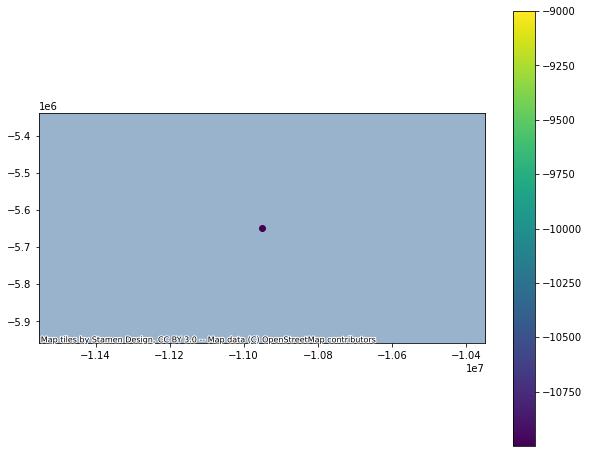

In [5]:
l4agdf_gsrm_epsg3857 = l4agdf_gsrm.to_crs(epsg=3857)
ax2=l4agdf_gsrm_epsg3857.plot(column='agbd_se_n', legend=True, figsize=(10, 8))
ctx.add_basemap(ax2)

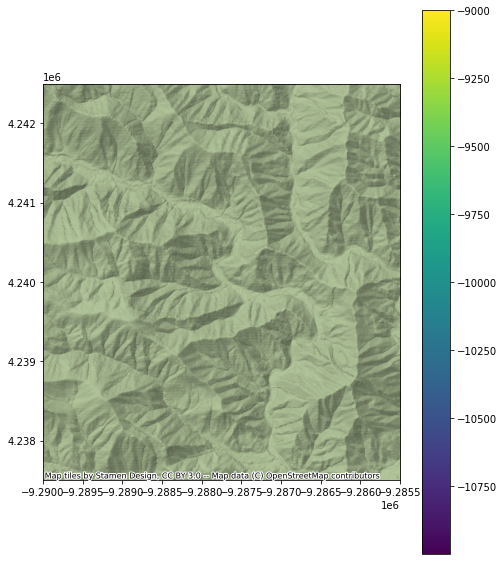

In [6]:
minx1, miny1, maxx1, maxy1 = [-9290000, 4237500, -9285500, 4242500]
ax3=l4agdf_gsrm_epsg3857.plot(column='agbd_se_n', legend=True, figsize=(8, 10))
ax3.set_xlim(minx1, maxx1)
ax3.set_ylim(miny1, maxy1)
ctx.add_basemap(ax3)

# close the opened hdf5 file
hf.close()